In [13]:
import pandas as pd

In [14]:
DATA_DIR ='data/Marital satisfaction_Data.xlsx'

In [15]:
allsheets = pd.read_excel(DATA_DIR, sheet_name=None, header=1)

In [16]:
allsheets.keys()

odict_keys(['Arkusz1', 'Arkusz2', 'Arkusz3'])

In [17]:
df = allsheets['Arkusz1']
df.head()

,Item number,1,2,3,4,5,6,7,8,9,...,21,22,1.1,2.1,3.1,4.1,1.2,2.2,3.2,4.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,National level,NaN,NaN,NaN,Individual level,NaN,NaN,NaN
1,Brazil,1.0,21.0,2.0,0.0,0.0,5.0,3.0,1.0,4.0,...,7.0,7.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
2,Brazil,1.0,29.0,3.0,1.0,0.0,5.0,3.0,1.0,6.0,...,6.0,6.0,2,1.0,1.0,1.0,1,1.0,1.0,1.0
3,Brazil,1.0,30.0,7.0,0.0,0.0,5.0,3.0,1.0,4.0,...,7.0,7.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0
4,Brazil,1.0,30.0,7.0,1.0,1.0,5.0,3.0,1.0,6.0,...,6.0,6.0,3,1.0,1.0,2.0,1,1.0,1.0,1.0


In [18]:
df = df.loc[1:,:]
df.head()

,Item number,1,2,3,4,5,6,7,8,9,...,21,22,1.1,2.1,3.1,4.1,1.2,2.2,3.2,4.2
1,Brazil,1.0,21.0,2.0,0.0,0.0,5.0,3.0,1.0,4.0,...,7.0,7.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
2,Brazil,1.0,29.0,3.0,1.0,0.0,5.0,3.0,1.0,6.0,...,6.0,6.0,2,1.0,1.0,1.0,1,1.0,1.0,1.0
3,Brazil,1.0,30.0,7.0,0.0,0.0,5.0,3.0,1.0,4.0,...,7.0,7.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0
4,Brazil,1.0,30.0,7.0,1.0,1.0,5.0,3.0,1.0,6.0,...,6.0,6.0,3,1.0,1.0,2.0,1,1.0,1.0,1.0
5,Brazil,1.0,28.0,9.0,0.0,0.0,4.0,2.0,1.0,5.0,...,6.0,7.0,3,2.0,3.0,2.0,1,1.0,1.0,1.0


In [31]:
df.iloc[:,1]

1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
       ... 
7174    1.0
7175    1.0
7176    1.0
7177    1.0
7178    1.0
Name: 1, Length: 7178, dtype: float64

In [40]:
country_col = 0
sex_col = 1
age_col = 2
marriage_duration_col = 3
n_children_col = 4
n_broughtup_children_col = 5
education_col = 6
material_status_col = 7
religion_col = 8
religiousity_col = 9
pension_col = 10

mrq_cols = range(11,20)
kansas_cols = range(20, 23)


In [52]:
MRQ = df.iloc[:,mrq_cols].mean(axis=1)
KANSAS = df.iloc[:, kansas_cols].mean(axis=1)
AGE_AT_MARRIAGE = df[age_col] - df[marriage_duration_col]

In [53]:
display(MRQ.head())
display(KANSAS.head())
AGE_AT_MARRIAGE.head()

1    1.222222
2    1.111111
3    1.333333
4    1.222222
5    1.222222
dtype: float64

1    7.000000
2    6.000000
3    7.000000
4    6.000000
5    6.666667
dtype: float64

1    19.0
2    26.0
3    23.0
4    23.0
5    19.0
dtype: float64

In [54]:
col_names = ['country', 
            'sex',
            'age',
            'marriage_duration',
            'n_children',
            'n_broughtup_children',
            'education',
            'material_status',
            'religion',
            'religiousity',
            'pension',
            'age_at_marriage',
            'mrq',
            'kansas']

In [97]:
data = pd.concat([df.iloc[:, :11],
                 AGE_AT_MARRIAGE,
                 MRQ,
                 KANSAS], axis=1)
data.columns = col_names
data.head()

,country,sex,age,marriage_duration,n_children,n_broughtup_children,education,material_status,religion,religiousity,pension,age_at_marriage,mrq,kansas
1,Brazil,1.0,21.0,2.0,0.0,0.0,5.0,3.0,1.0,4.0,4.0,19.0,1.222222,7.000000
2,Brazil,1.0,29.0,3.0,1.0,0.0,5.0,3.0,1.0,6.0,5.0,26.0,1.111111,6.000000
3,Brazil,1.0,30.0,7.0,0.0,0.0,5.0,3.0,1.0,4.0,4.0,23.0,1.333333,7.000000
4,Brazil,1.0,30.0,7.0,1.0,1.0,5.0,3.0,1.0,6.0,7.0,23.0,1.222222,6.000000
5,Brazil,1.0,28.0,9.0,0.0,0.0,4.0,2.0,1.0,5.0,7.0,19.0,1.222222,6.666667


In [100]:
data.isna().sum(axis=0)
# Take note for religion, there are some missing values. Maybe default to free thinker?

country                  0
sex                      0
age                      0
marriage_duration        0
n_children               0
n_broughtup_children     0
education                0
material_status          0
religion                86
religiousity             0
pension                  0
age_at_marriage          0
mrq                      0
kansas                   0
dtype: int64

In [69]:
def groupby_mean():
    pass

In [71]:
MRQ_overall = data.loc[:, ['age_at_marriage', 'mrq']]
MRQ_overall.head()

,age_at_marriage,mrq
1,19.0,1.222222
2,26.0,1.111111
3,23.0,1.333333
4,23.0,1.222222
5,19.0,1.222222


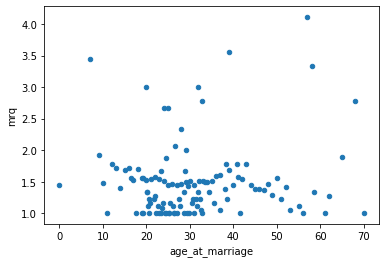

In [91]:
MRQ_overall.groupby('age_at_marriage', as_index=False).mean().plot(x='age_at_marriage', y='mrq',kind='scatter');

In [102]:
MRQ_with_country = data.loc[:, ['country','age_at_marriage', 'mrq']]
MRQ_with_country.head()

,country,age_at_marriage,mrq
1,Brazil,19.0,1.222222
2,Brazil,26.0,1.111111
3,Brazil,23.0,1.333333
4,Brazil,23.0,1.222222
5,Brazil,19.0,1.222222


In [105]:
by_country_age = MRQ_with_country.groupby(['country', 'age_at_marriage'], as_index=False).mean()#.reset_index()
#by_country_age['Item number'] = by_country_age['Item number'].str.strip()
by_country_age

,country,age_at_marriage,mrq
0,Brazil,13.0,1.222222
1,Brazil,14.0,1.259259
2,Brazil,15.0,1.111111
3,Brazil,16.0,1.652778
4,Brazil,17.0,1.577778
...,...,...,...
919,Uganda,38.0,1.111111
920,Uganda,40.0,2.222222
921,Uganda,41.0,2.000000
922,Uganda,44.0,1.000000


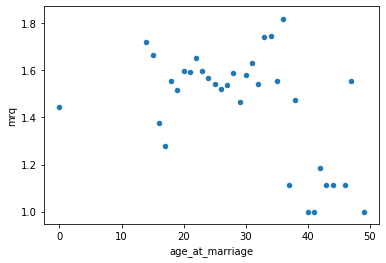

In [108]:
by_country_age.loc[by_country_age.loc[:, 'country'] == 'Croatia', :].plot(x='age_at_marriage', y='mrq',kind='scatter');

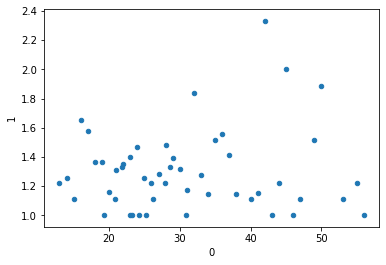

In [90]:
by_country_age.loc[by_country_age.loc[:, 'Item number'] == 'Brazil', :].plot(x=0, y=1,kind='scatter');

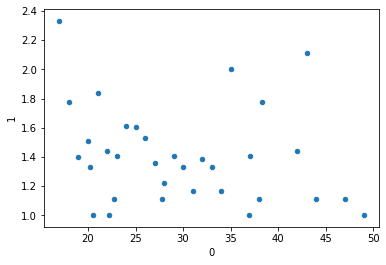

In [92]:
by_country_age.loc[by_country_age.loc[:, 'Item number'] == 'Estonia', :].plot(x=0, y=1,kind='scatter');

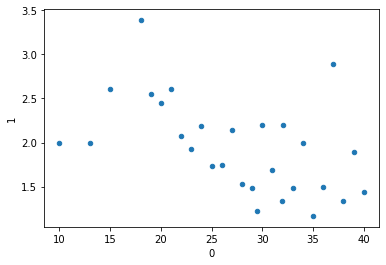

In [95]:
by_country_age.loc[by_country_age.loc[:, 'Item number'] == 'HongKong', :].plot(x=0, y=1,kind='scatter');